# Main Goals:
1. Make sure columns are the appropriate data type
2. Identify columns with any null values or duplicated values
3. Remove columns that I believe are not necessary for analysis
4. Check for linearity using correlation coeafficients
5. Remove outliers
6. Checck for normality using qq plot and distplot
7. Select features for modeling
8. One hot encode anything that needs to be

# Questions to consider:
1. What features in this dataset can be good predictors for the price of a home?
2. What features in this dataset would decrease the price of a home and which ones would increase the price of a home?
3. Would the year built matter for the price of a home as well as a renovation?
4. Does location of a home matter in King County?

# Data Overview

In [1]:
# import any necessary libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset and view contents
king = pd.read_csv("../data/kc_house_data.csv")
king.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [3]:
# View the columns in the king dataframe
king.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
# View datatypes in each column 
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

**Observations:**
1. date, yr_built, yr_renovated should be in datetime format

# Deal with Duplicates and Null values

In [5]:
# Look at the unique identifier column and see if every record is a unique home 
print(king['id'].nunique())
#get sum of duplicates
king['id'].duplicated().sum()

30154


1

It seems that there is only 1 duplicate record so now lets drop that record.

In [6]:
#drop duplicates and only keep the most current data
king = king.sort_values('id').drop_duplicates(subset = 'id', keep = 'first')

#get sum of duplicates
king['id'].duplicated().sum()

0

Now that duplicates have been removed lets start removing any null values or missing values. 

In [7]:
#check for null values
king.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [8]:
# Just based off know the size of the dataset 32 values max is a very small percentage of data. It would be appropriate to drop the rows. 
king.dropna(axis=0, inplace=True)

#check for null values to make sure
king.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [9]:
# Since we sorted it already and took care of the duplicates lets drop our identifiers column since it is no longer needed.
king.drop(labels='id', axis=1, inplace=True)

# Correct datatypes 

In [10]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 21177 to 26110
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30110 non-null  object 
 1   price          30110 non-null  float64
 2   bedrooms       30110 non-null  int64  
 3   bathrooms      30110 non-null  float64
 4   sqft_living    30110 non-null  int64  
 5   sqft_lot       30110 non-null  int64  
 6   floors         30110 non-null  float64
 7   waterfront     30110 non-null  object 
 8   greenbelt      30110 non-null  object 
 9   nuisance       30110 non-null  object 
 10  view           30110 non-null  object 
 11  condition      30110 non-null  object 
 12  grade          30110 non-null  object 
 13  heat_source    30110 non-null  object 
 14  sewer_system   30110 non-null  object 
 15  sqft_above     30110 non-null  int64  
 16  sqft_basement  30110 non-null  int64  
 17  sqft_garage    30110 non-null  int64  
 18  sq

Lets begin by converting the columns date, yr_built, yr_renovated into datetime format.

In [11]:
import datetime

# Check if the columns are in datetime format
subset = ["date", "yr_built", "yr_renovated"]

for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

False
False
False


Now that we made sure they are not in datetime format lets convert them to date format.

In [12]:
# State columns desired for datetime format
subset = ["date", "yr_built", "yr_renovated"]

for col in subset:
    king[col] = pd.to_datetime(king[col])

# Check if for loop worked correctly
for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

True
True
True


Another data column that is incorrect should be grade. It is a categorical variable however can't be interpreted since it is a string. However we can extract the associated number since it is included. 

In [13]:
king['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3803
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [14]:
# Define the regular expression pattern to extract the number and word separately
pattern = r'(\d+)\s(.+)'

# Use str.extract() to extract the number and word and create new columns
king[['extracted_grade_num', 'extracted_class']] = king['grade'].str.extract(pattern)

# Convert the 'extracted_number' column to integers
king['extracted_grade_num'] = king['extracted_grade_num'].astype(int)

In [15]:
king.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,extracted_grade_num,extracted_class
21177,2021-10-20,248448.0,3,1.5,1790,39808,1.0,NO,NO,NO,...,0,460,290,1970-01-01 00:00:00.000001958,1970-01-01,"1526 I Street Northeast, Auburn, Washington 98...",47.32178,-122.21875,7,Average
10844,2022-04-05,609000.0,4,1.5,2232,12866,1.5,NO,NO,NO,...,0,440,60,1970-01-01 00:00:00.000001934,1970-01-01,"1412 I Street Northeast, Auburn, Washington 98...",47.32083,-122.21874,7,Average
9292,2022-05-26,1020000.0,5,2.0,2760,15156,1.0,NO,NO,NO,...,1380,0,0,1970-01-01 00:00:00.000001954,1970-01-01,"1104 Southwest Shorebrook Drive, Normandy Park...",47.44375,-122.34868,8,Good


The last column that we need to change is the condition column. This column only contains the condition name but not its numeric value. We can subsitute the condition for just the number by adding a new column next to it with a for loop. 

Accodring to the website the following applies to that column:

"
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.
"

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r 

In [16]:
# View the values in the column to make sure they line up correctly wth the website values. 
king['condition'].value_counts()

Average      18514
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [17]:
# Create a map of conditions strings to its associated values.
condition_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Create a new column 'condition_num' and populate it before substitution
king['condition_num'] = 0  # Initialize the new column with 0

for index, val in king['condition'].items():
    if val in condition_mapping:
        king.loc[index, 'condition_num'] = condition_mapping[val]
    else:
        print(f"Warning: Condition '{val}' not found in the mapping.")

In [18]:
king[['condition', 'condition_num']].head(5)

,condition,condition_num
21177,Good,4
10844,Good,4
9292,Good,4
17878,Average,3
14450,Very Good,5


# Exploratory Data Analysis

### Determine Linearity between variables

Determine Linerity Visually first between variables

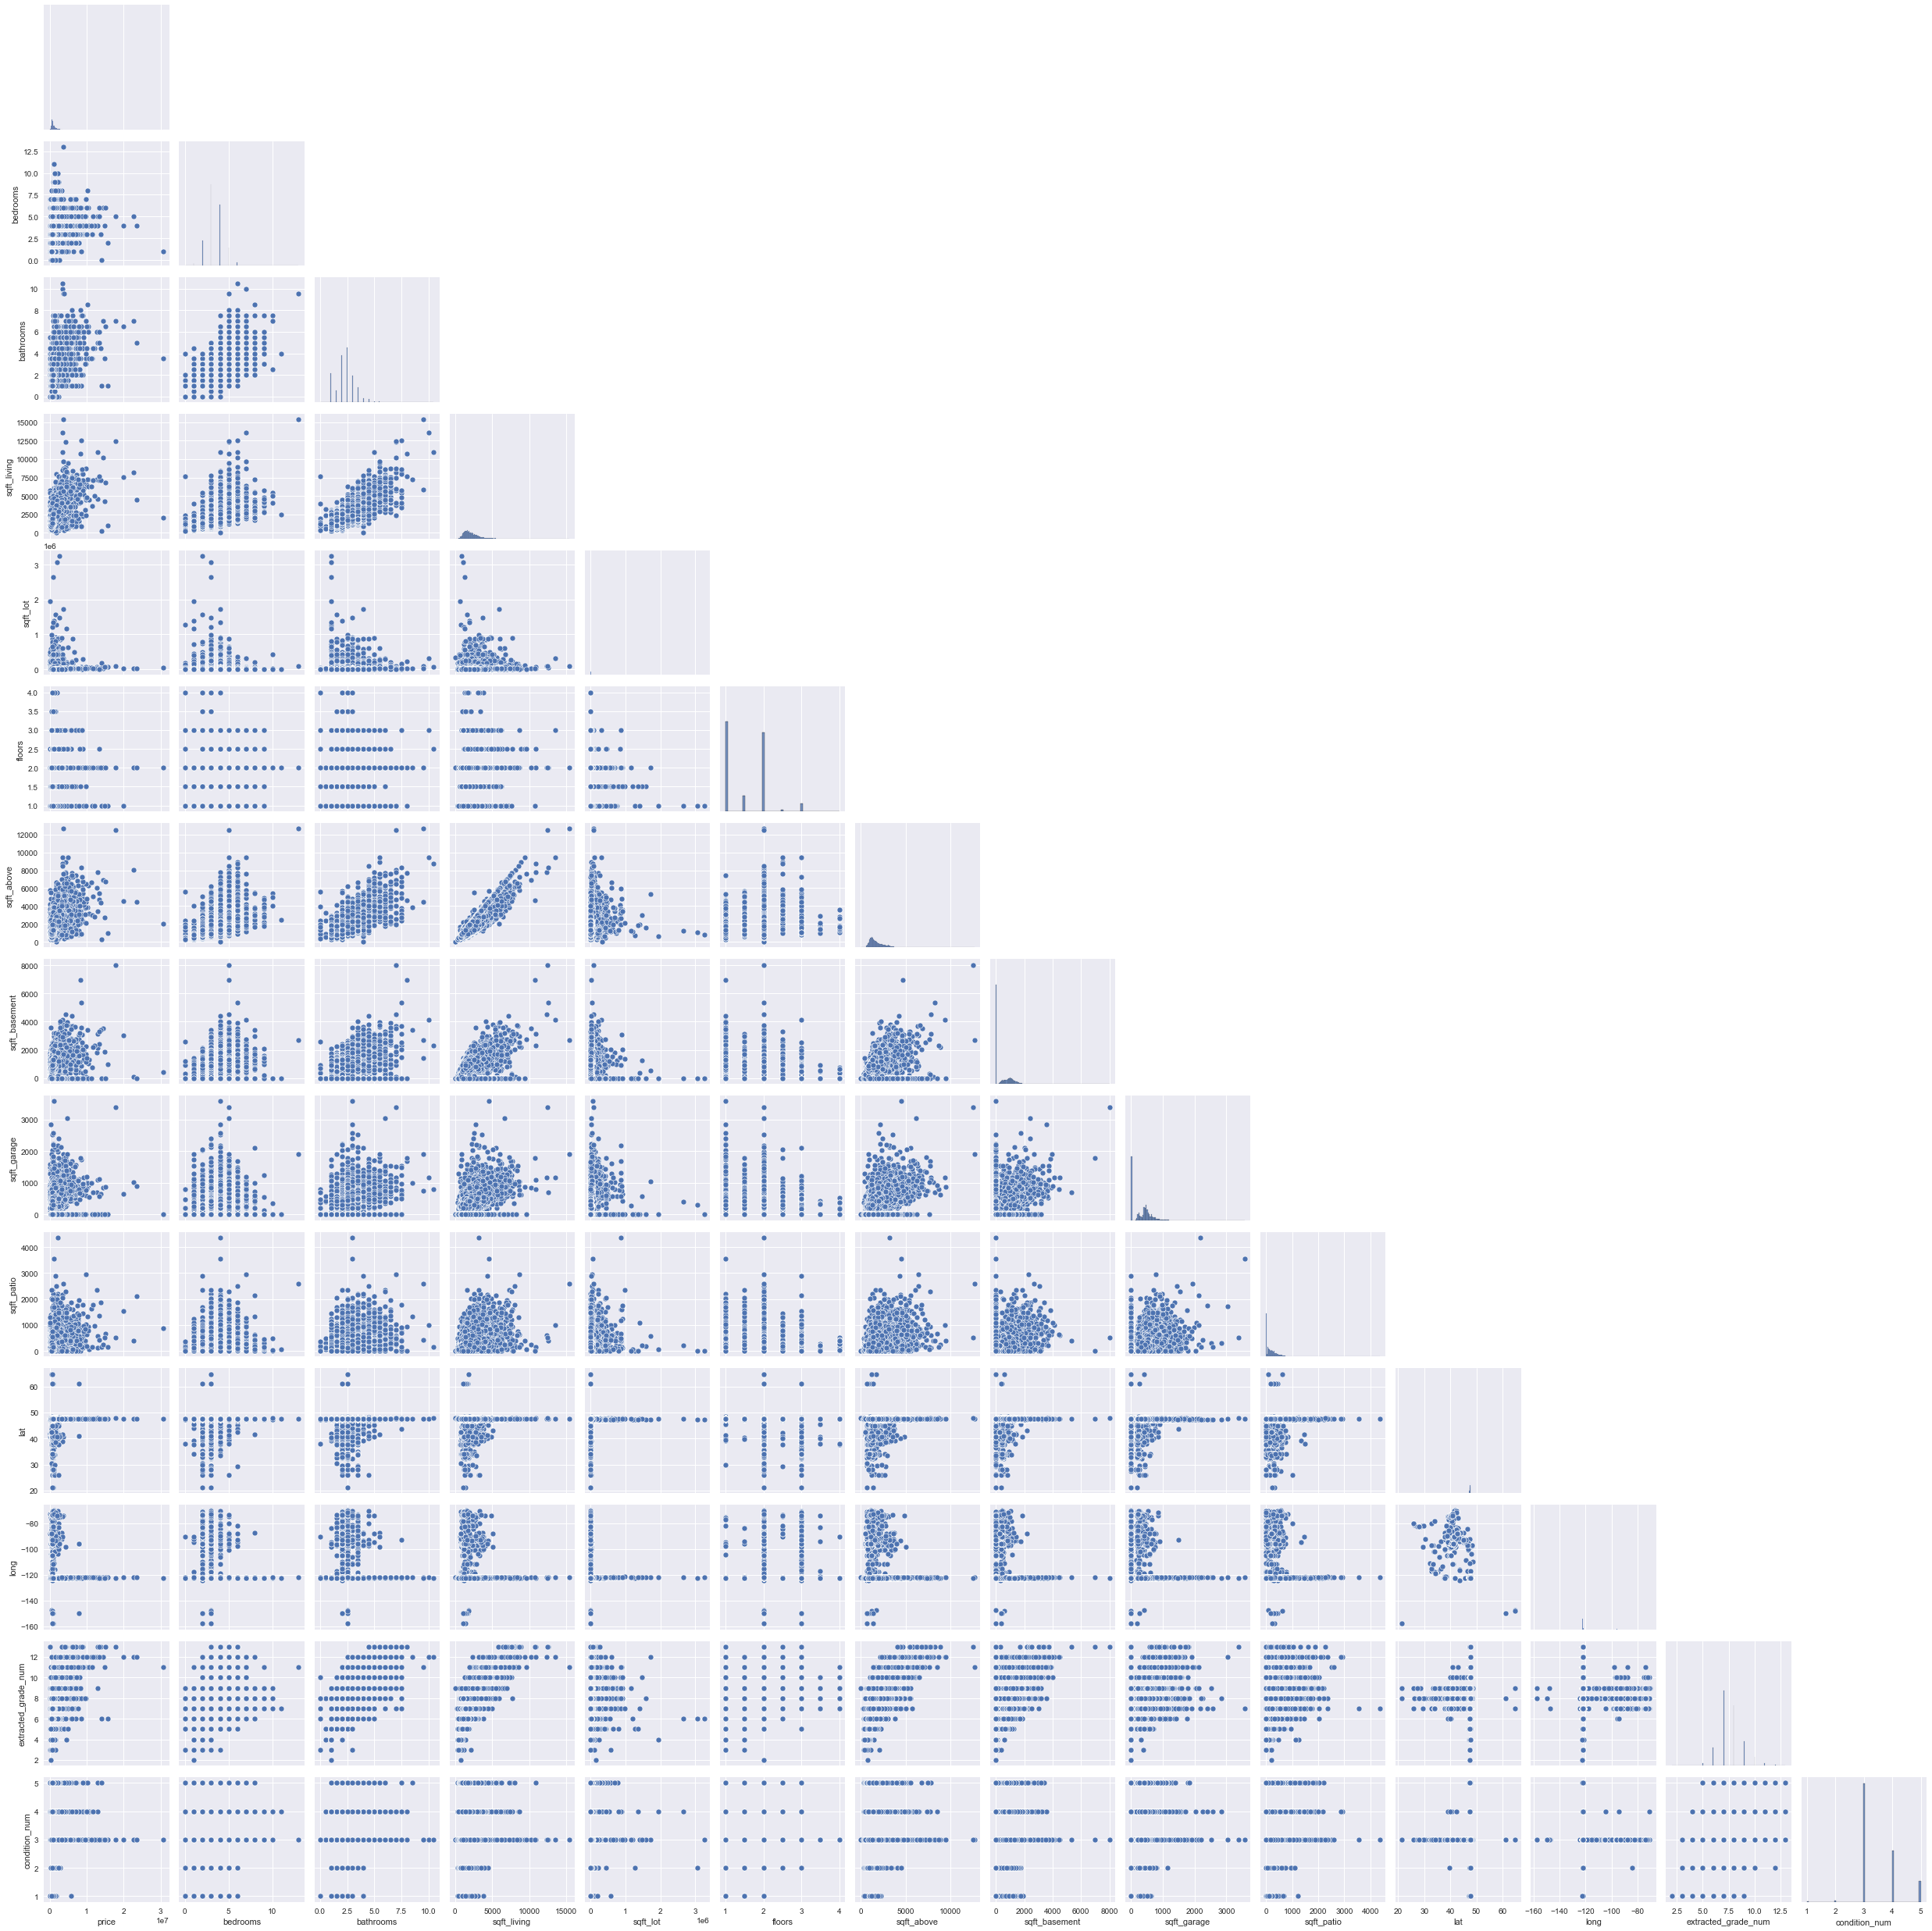

In [19]:
# Create a scatter plot matrix using seaborn
sns.pairplot(king, diag_kind='hist', corner=True)

**Observations:**
There is some degree of linearity for the following pairs that I think contribute most to a homes value:
* 'price vs sqft_above', 'price vs sqft_living', 'price vs bathrooms', 'price vs bedrooms'
* 'sqft_living vs sqft_above'

We have two types of data in this dataset. There are categorical variables and continuous variables. Based off the descriptions and viewing the descriptions the following conclusion can be made:
1. continuous variables = price, sqft_living, sqft_lot, sqft_above, sqft_basement
2. categorical variables = bedrooms, bathrooms, floors, waterfront, condition, grade

That being said lets split our data to view how they behave in respect to price which is our target variable. 

In [20]:
# split data into 2 groups of type continous and type categoricals.
# Add price to both groups to view correlations in respect to price.
continuous = ['price', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'extracted_grade_num', 'condition_num']

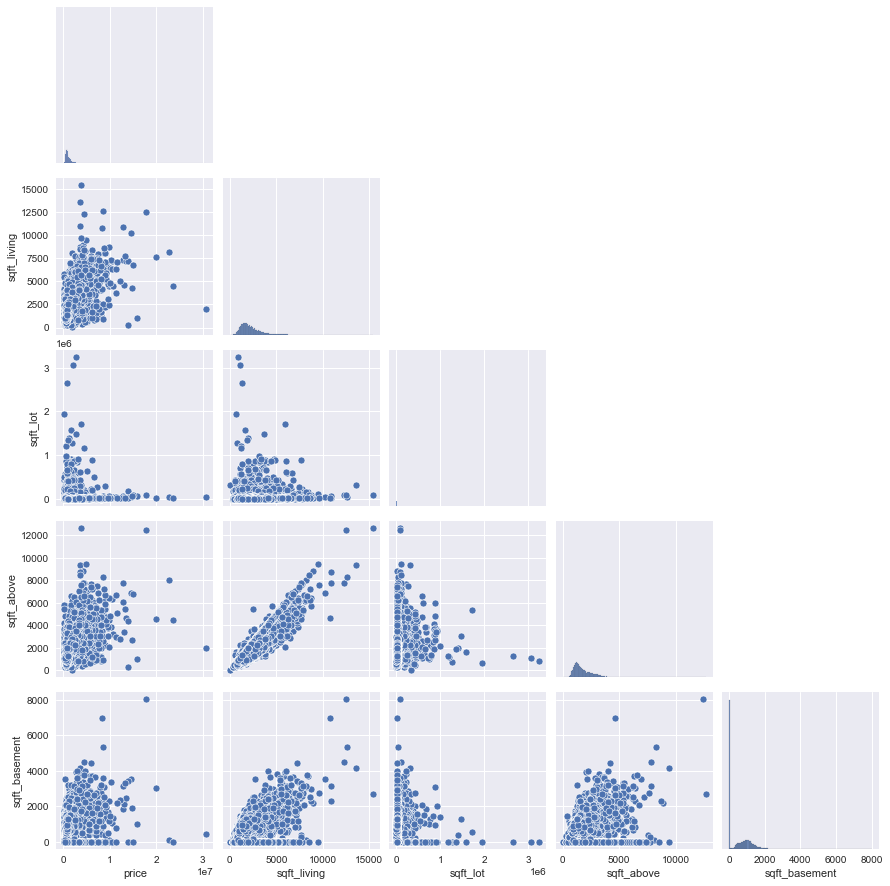

In [21]:
# Create a scatter plot matrix for continuous values using seaborn
sns.pairplot(king[continuous], diag_kind='hist', corner=True)

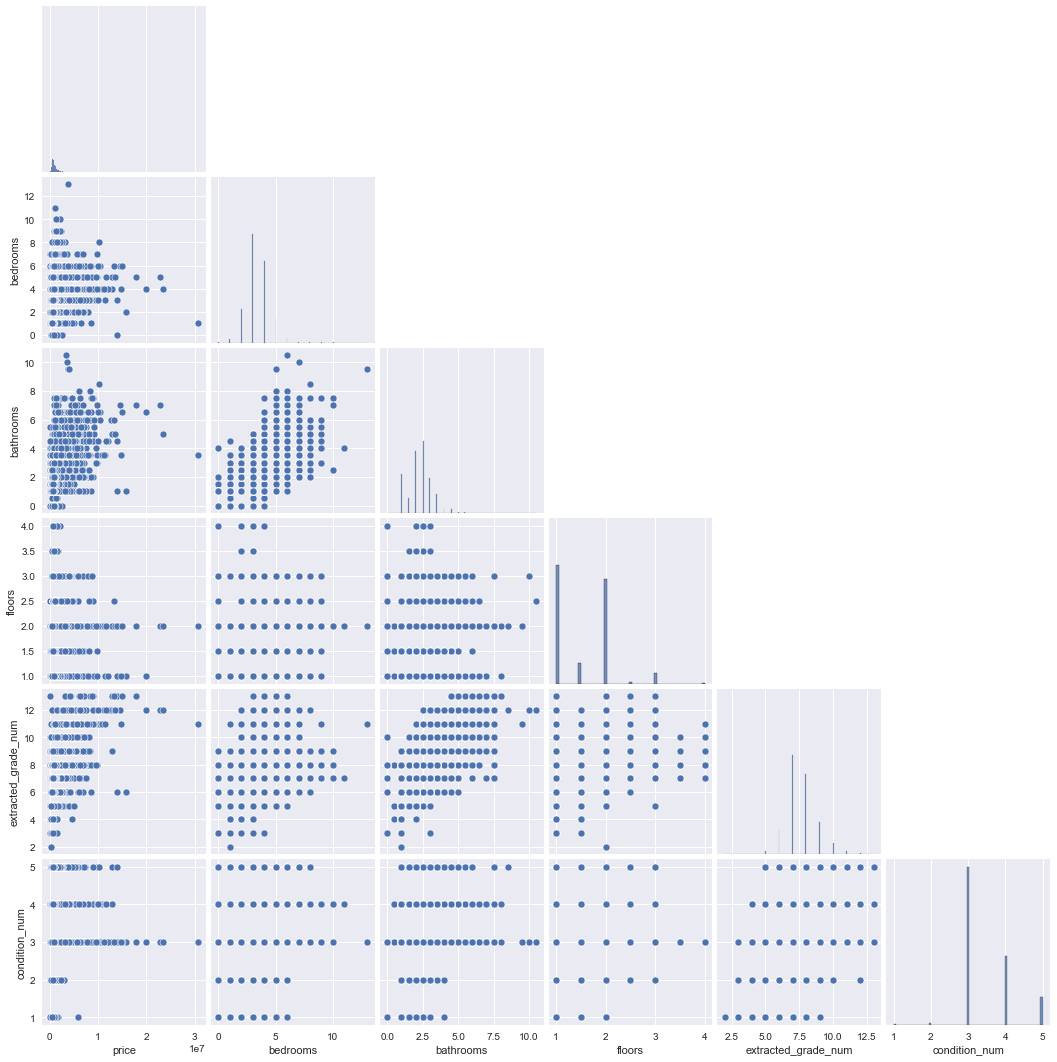

In [22]:
# Create a scatter plot matrix for categorical values using seaborn
sns.pairplot(king[categoricals], diag_kind = 'hist', corner = True)


View correlations matrix with respect to price

In [23]:
king.corr()['price']

price                  1.000000
bedrooms               0.288992
bathrooms              0.480284
sqft_living            0.608586
sqft_lot               0.086562
floors                 0.180555
sqft_above             0.538614
sqft_basement          0.244938
sqft_garage            0.263655
sqft_patio             0.313787
lat                    0.063419
long                  -0.022271
extracted_grade_num    0.566508
condition_num         -0.009563
Name: price, dtype: float64

# Factors to consider for each feature of a Home
We are looking at linearity of a feature with respect to 'price'. We should consider the following factors:

### **Skweness**
Skewness is the degree of distortion or deviation from the symmetrical normal distribution. Skewness can be seen as a measure to calculate the lack of symmetry in the data distribution. Skewness helps you identify extreme values in one of the tails. Symmetrical distributions have a skewness of 0.
* A distribution is positively skewed when the tail on the right side of the distribution is longer (also often called "fatter"). When there is positive skewness, the mean and median are bigger than the mode.
* Distributions are negatively skewed when the tail on the left side of the distribution is longer or fatter than the tail on the right side. When there is negative skewness, the mean and median are smaller than the mode.
* Skewness talks about extreme values in one tail 
* The "normality assumption" does not hold when data is skewed. When data is skewed, it must be transformed first in order to interpret that data.
#### When data is skewed use the following rules:
The rule of thumb seems to be:
* A skewness between -0.5 and 0.5 means that the data are pretty symmetrical
* A skewness between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed) means that the data are moderately skewed.
* A skewness smaller than -1 (negatively skewed) or bigger than 1 (positively skewed) means that the data are highly skewed.

![Skewness distributions](../images/Skewness_Image.png)

### **Kurtosis**
Kurtosis deals with the lengths of tails in the distribution. kurtosis aims at identifying extreme values in both tails at the same time. Kurtosis can be viewed as a measure of outliers present in the distribution.
#### Mesokurtic (kurtosis = 3) 
* Kurtosis statistics that lie close to the ones of a normal distribution. 
* Mesokurtic distributions have a kurtosis of around 3. According to this definition, the standard normal distribution has a kurtosis of 3.
#### Platykurtic (kurtosis < 3)
* The distribution is shorter and tails are thinner than the normal distribution. 
* The peak is lower and broader than Mesokurtic, which means that the tails are light and that there are fewer outliers than in a normal distribution.
#### Leptokurtic (kurtosis > 3)
* A distribution with longer and fatter tails. 
* The peak is higher and sharper than the peak of a normal distribution, which means that data have heavy tails and that there are more outliers.
* Outliers stretch your horizontal axis of the distribution, which means that the majority of the data appear in a narrower vertical range. That is why the leptokurtic distribution looks "skinny".

![Kurtosis distributions](../images/Kurtosis_types.png)

### **Pearson correlation**
* A value = 0 suggets no correlation between variables.
* A value closer to 0 implies weaker correlation between variables.
* A value closer to 1 implies stronger positive correlation between variables.
* A value closer to -1 implies stronger negative correlation between variables.

# What features in this dataset can be good predictors for the price of a home?
### Target Variable : Price

In [24]:
"""
Lets begin by observing basic statistics about the price itself. 
Observe if the price is skewed as well as its kurtosis. 
Viewing both can give us direction to determine how to deal with the price data. 
1. View skewness and Kurtosis values.
2. View a basic scatter plot of price and the number of prices/counts of each price.
3. Generate Q-Q plot to view normality of data. 
"""

'\nLets begin by observing basic statistics about the price itself. \nObserve if the price is skewed as well as its kurtosis. \nViewing both can give us direction to determine how to deal with the price data. \n1. View skewness and Kurtosis values.\n2. View a basic scatter plot of price and the number of prices/counts of each price.\n3. Generate Q-Q plot to view normality of data. \n'

In [25]:
# Generate summary statistics & remove scientific notation
king['price'].describe()

count    3.011000e+04
mean     1.108921e+06
std      8.964895e+05
min      2.736000e+04
25%      6.491180e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [26]:
# Obtain skewness value
skewness = king['price'].skew()
print('Skewness_value: ', skewness)
# Obtain Kurtosis value
kurtosis = king['price'].kurtosis()
print('kurtosis_value: ', kurtosis)

Skewness_value:  6.608504428167346
kurtosis_value:  106.26296241029947


1. Overall the price data is very positively skewed and favors is skewed towards values in price closer to zero dollars. 
2. The kurtosis value suggests that the data in price is leptokurtic. This suggests that there is a large tail due to large outliers. This most likely indicates that there are homes that sold for millions of dollars more in higher class areas in this datasey which might be rare to sell. 

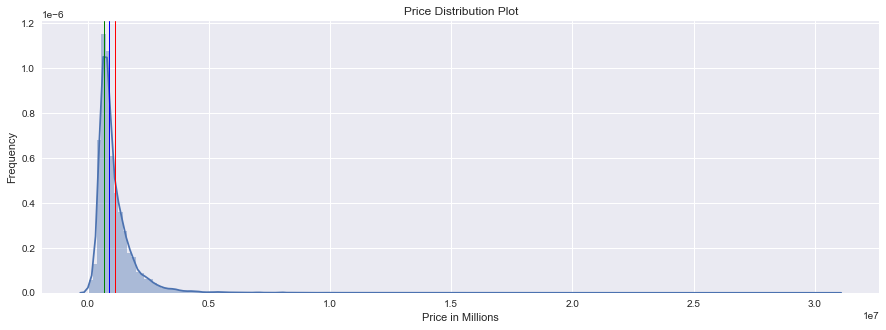

Text(0.5, 1.0, 'Price Qunatile-Quantile Plot')

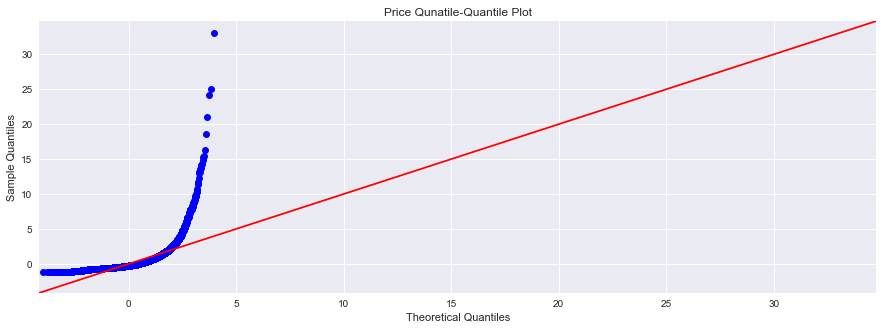

In [27]:
# Generate a distribution plot to view the price data. 
plt.figure(figsize=(15, 5))
sns.distplot(king['price'], bins=int(round(len(king['price'])**0.5)), kde=True)
plt.xlabel("Price in Millions")
plt.ylabel("Frequency")
plt.title("Price Distribution Plot")
plt.axvline(x=king['price'].mean(), linestyle="-", linewidth=1, color="r")
plt.axvline(x=king['price'].median(), linestyle="-", linewidth=1, color="b")
plt.axvline(x=king['price'].mode().iloc[0], linestyle="-", linewidth=1, color="g")
plt.xticks(fontsize = 10)
plt.show()

#check for normality
fig = sm.graphics.qqplot(king['price'], dist = stats.norm, line = '45', fit = True)
fig.set_size_inches(15, 5)
plt.title('Price Qunatile-Quantile Plot')

Clearly the price distribution does not follow a normal distribution and would require a transformation. Lets transform the price data by using log transformation to help with this. 

In [28]:
# Log transformation and create a new colun with that transformation.
king['price_log'] = np.log(king['price'])

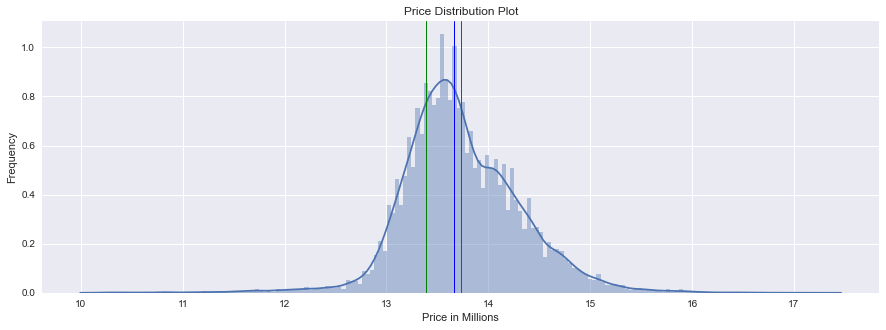

Text(0.5, 1.0, 'Price Qunatile-Quantile Plot')

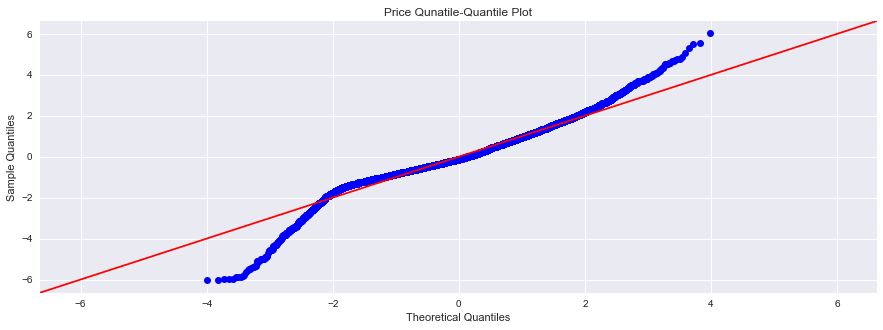

In [29]:
# Generate a distribution plot to view the price_log data. 
plt.figure(figsize=(15, 5))
sns.distplot(king['price_log'], bins=int(round(len(king['price'])**0.5)), kde=True)
plt.xlabel("Price in Millions")
plt.ylabel("Frequency")
plt.title("Price Distribution Plot")
plt.axvline(x=king['price_log'].mean(), linestyle="-", linewidth=1, color="r")
plt.axvline(x=king['price_log'].median(), linestyle="-", linewidth=1, color="b")
plt.axvline(x=king['price_log'].mode().iloc[0], linestyle="-", linewidth=1, color="g")
plt.xticks(fontsize = 10)
plt.show()

#check for normality in price_log
fig = sm.graphics.qqplot(king['price_log'], dist = stats.norm, line = '45', fit = True)
fig.set_size_inches(15, 5)
plt.title('Price Qunatile-Quantile Plot')

In [30]:
# Obtain skewness value
skewness = king['price_log'].skew()
print('Skewness_value: ', skewness)
# Obtain Kurtosis value
kurtosis = king['price_log'].kurtosis()
print('kurtosis_value: ', kurtosis)

Skewness_value:  0.11568186154439063
kurtosis_value:  2.4662874964208763


**Observations:**
1. Overall a log transformation helped tremendously in transforming the price values closer to a normal distribution. 
2. The skewness value suggets that the price_log data is pretty symmetrical. 
3. The kurtosis value suggets that the price_log data is now Platykurtic. 

#### Observe and check for linearity with target variable of interest price_log with other features of a house.

The continuos variables in this dataset are: 
* sqft_living
* sqft_above
* sqft_basement
* sqft_lot
* sqft_garage
* sqft_patio
* price
* lat
* long

The categoraical variables in this dataset are: 
* bedrooms
* bathrooms
* floors
* waterfront
* greenbelt
* nuisance
* view
* condition
* grade
* heat_source
* sewer_system
* yr_built
* yr_renovated

#### Linearity check of Continuos variables

In [31]:
# View columns in dataset.
for col in king.columns:
    print(col)

date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
greenbelt
nuisance
view
condition
grade
heat_source
sewer_system
sqft_above
sqft_basement
sqft_garage
sqft_patio
yr_built
yr_renovated
address
lat
long
extracted_grade_num
extracted_class
condition_num
price_log


In [32]:
# define subset of continuous variables 
continuos = ["sqft_living", "sqft_above", "sqft_basement", "sqft_lot", "sqft_garage", "sqft_patio", "lat", "long"]

In [33]:
# Create a function that can return linearity information and geenrate disttribution plots and q-q plots
def linearity_check(data, list):
    """
    Function arguments are data=dataframe, target=target_variable to check target variable for linearity check. 
    Generates Q-Q plots and distribution plots as well an organized dataframe containing the skewness and kurtosis values of the variables in list.
    """
    result_df = pd.DataFrame(columns=['Variable', 'Skewness', 'Kurtosis'])
    
    for target in list:
    # Extracting the mean, median
        mean_value = data[target].mean()
        median_value = data[target].median()
        
        # Generate distribution plot with target variable
        plt.figure(figsize=(15, 5))
        sns.distplot(data[target], bins=int(round(len(data[target])**0.5)), kde=True)
        plt.xlabel(f"{target}")
        plt.ylabel("Frequency")
        plt.title(f"{target} Distribution Plot")
        plt.axvline(x=mean_value, linestyle="-", linewidth=1, color="r")
        plt.axvline(x=median_value, linestyle="-", linewidth=1, color="b")
        plt.xticks(fontsize = 10)
        plt.show()
        
        #check for normality in price_log
        fig = sm.graphics.qqplot(data[target], dist = stats.norm, line = '45', fit = True)
        fig.set_size_inches(15, 5)
        plt.title(f'{target} Quantile-Quantile Plot')
        
        # Generates skewness value
        skewness_value = data[target].skew()
        # Generates kurtosis value
        kurtosis_value = data[target].kurtosis()
        
        # Append to the result dataframe
        result_df = result_df.append({'Variable': target, 'Skewness': skewness_value, 'Kurtosis': kurtosis_value}, ignore_index=True)
    return result_df

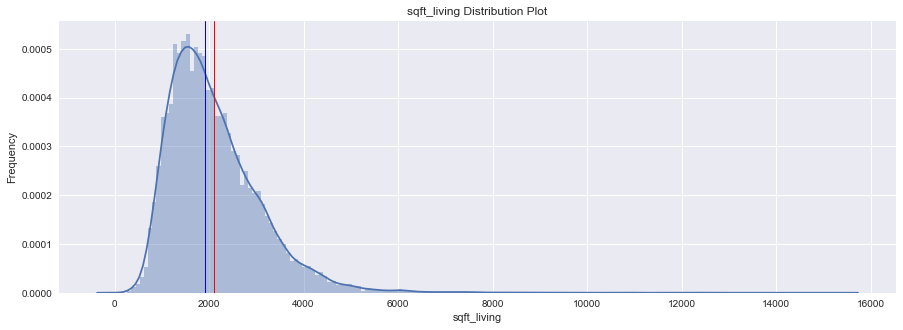

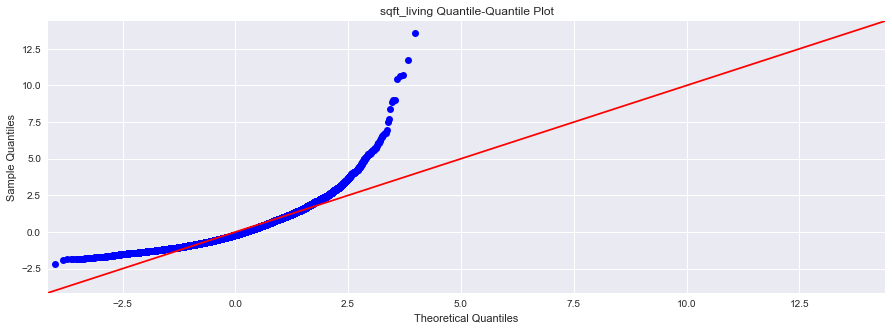

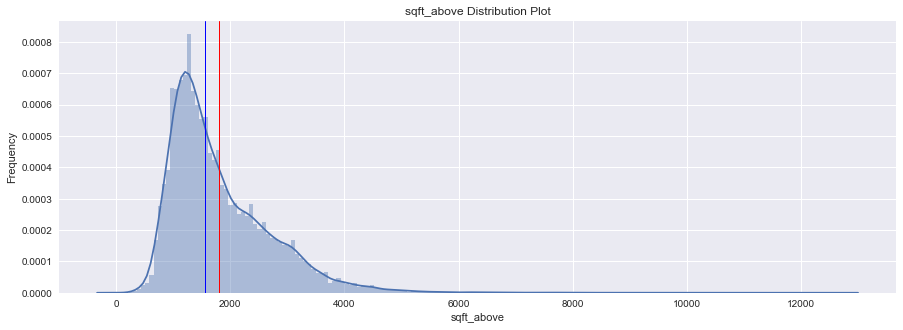

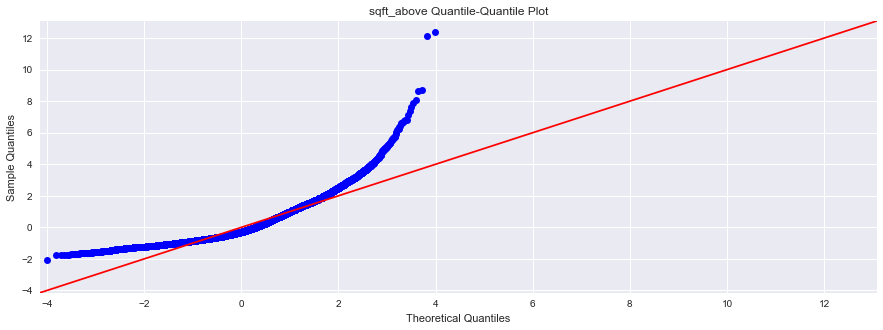

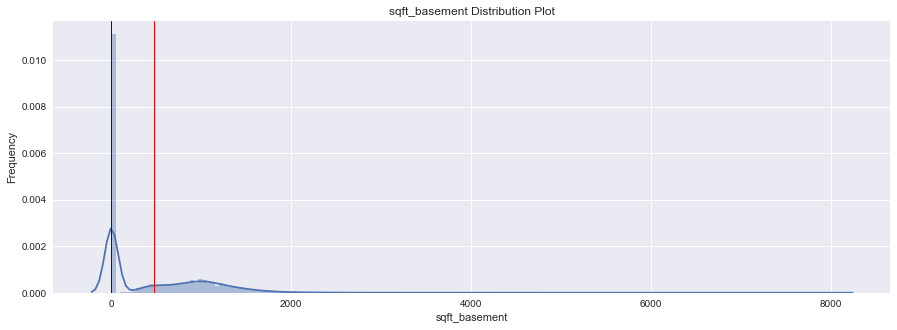

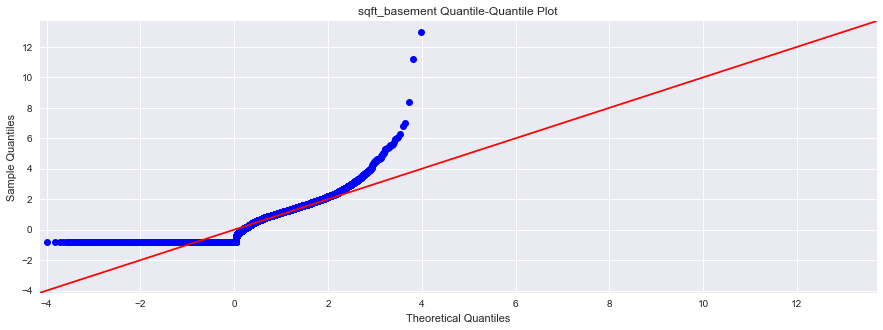

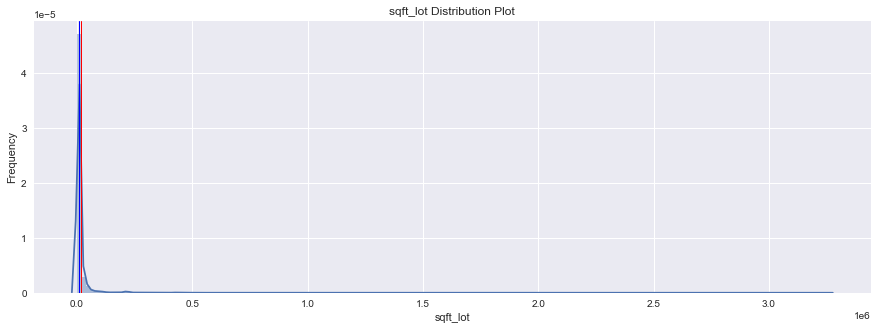

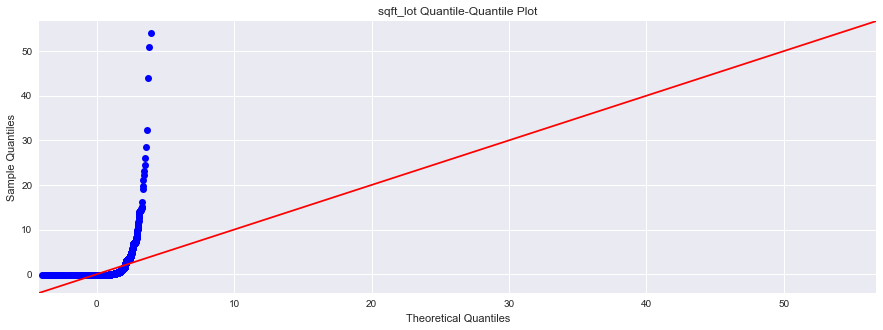

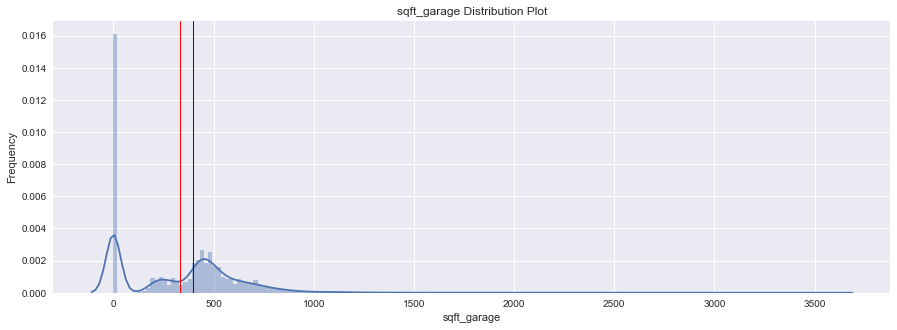

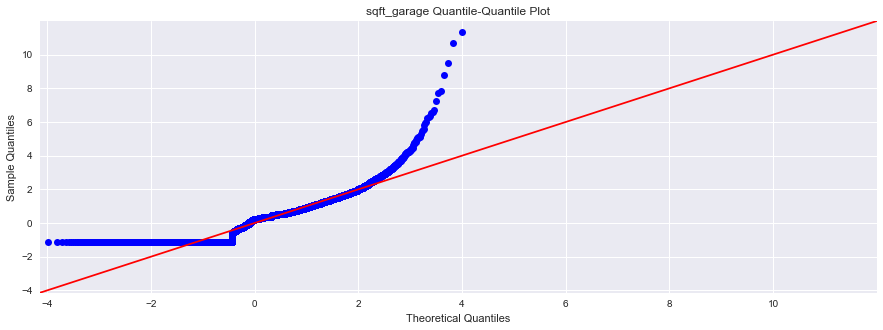

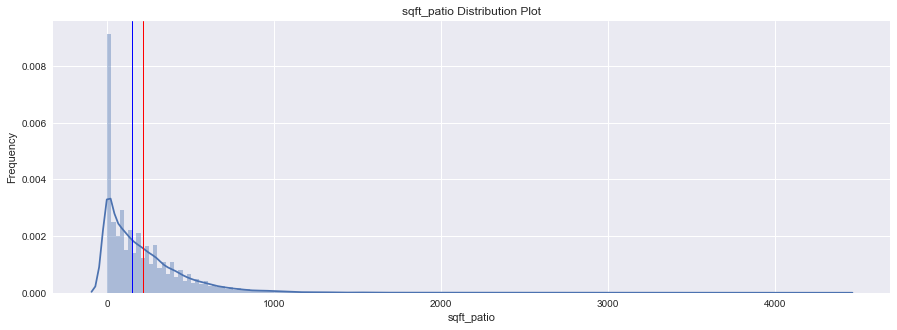

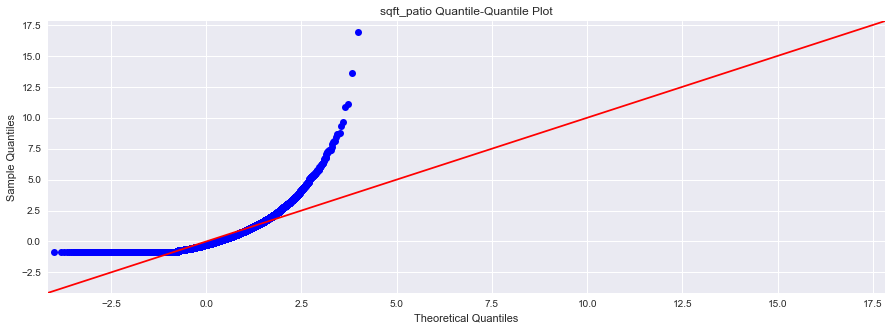

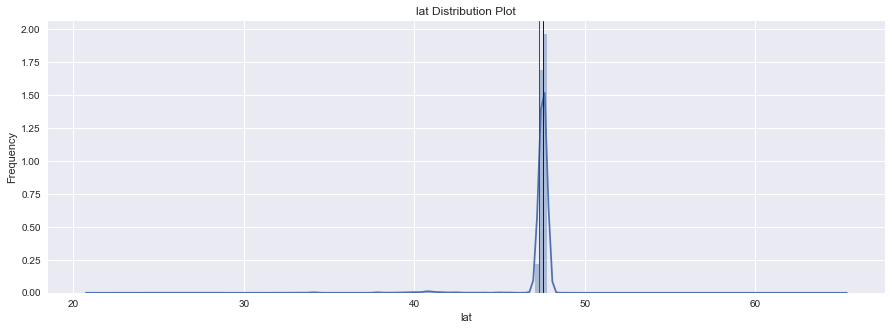

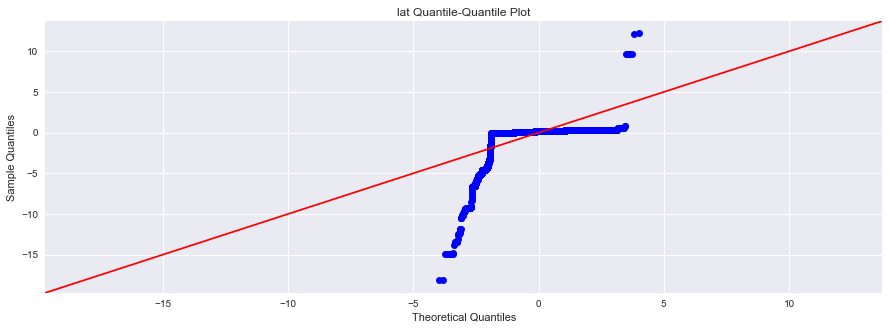

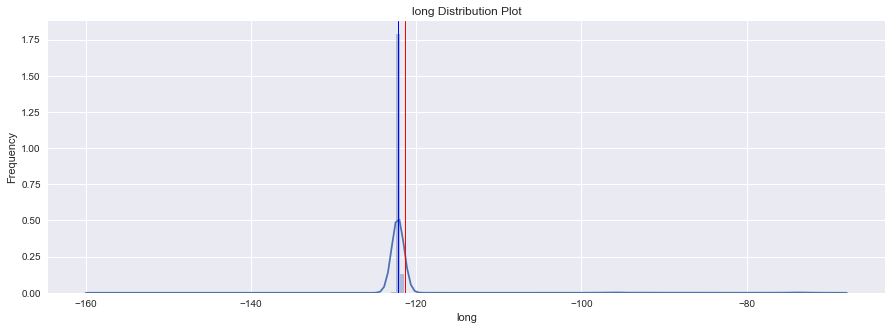

,Variable,Skewness,Kurtosis
0,sqft_living,1.611730,6.720625
1,sqft_above,1.556087,4.811108
2,sqft_basement,1.110242,2.178890
3,sqft_lot,21.277548,791.674133
4,sqft_garage,0.665554,2.145182
5,sqft_patio,2.346323,11.684839
6,lat,-7.198693,72.381373
7,long,6.549383,44.878786


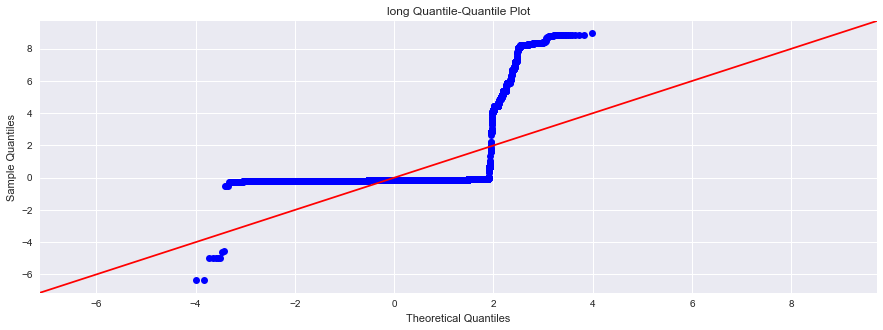

In [34]:
linearity_check(king, continuos)

**Observations**: 

Sqft_living:

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality.

sqft_above: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality.

sqft_basement: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. Many homes do not actually have a basement. Maybe it would be best to use this feature as an interaction term as well. Compare if having a basement in a home has a trend to increase value in a home. 

sqft_lot: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality. It also seems that it has major outliers.

sqft_garage: 

> We can see how the data is positively skewed moderately. It is also Platykurtic. We can attempt a log transformation to bring the data closer norm. It also seems that not every home has a garage. Maybe it would be better to use this as an interaction term.

sqft_patio: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality. It also seems that not every home has a patio. Maybe it would be better to use this as an interaction term.

lat and long: 

> This data should not be changed since there coordinates. However this can be used as an interaction variable for price to see if location matters for homes and their value. 

#### Log Transformation for continuous variables. 

In [35]:
# Create a function that can transform the features into log[feature]. 
def transform(data, feature):
    """
    Takes in a dataset=data and a subset of columns=feature. 
    Function then transforms the features into log[feature] and appends a new column in the original dataframe. 
    """
    # import required libraries.
    import numpy as np
    # for loop iterating through columns in subset.
    for col in feature:
        data[f"{col}_log"] = np.log(data[col])

In [36]:
# Create a new subset because we don't want to transform the coordinates of the homes long and latitude 
# as well as the basement since we will be using it instead as a categorical variable.
continuos_2 = ["sqft_living", "sqft_above", "sqft_lot"]

# Use log transformation function
transform(king, continuos_2)

king.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,address,lat,long,extracted_grade_num,extracted_class,condition_num,price_log,sqft_living_log,sqft_above_log,sqft_lot_log
21177,2021-10-20,248448.0,3,1.5,1790,39808,1.0,NO,NO,NO,...,"1526 I Street Northeast, Auburn, Washington 98...",47.32178,-122.21875,7,Average,4,12.422989,7.489971,7.489971,10.591823
10844,2022-04-05,609000.0,4,1.5,2232,12866,1.5,NO,NO,NO,...,"1412 I Street Northeast, Auburn, Washington 98...",47.32083,-122.21874,7,Average,4,13.319574,7.710653,7.710653,9.462343
9292,2022-05-26,1020000.0,5,2.0,2760,15156,1.0,NO,NO,NO,...,"1104 Southwest Shorebrook Drive, Normandy Park...",47.44375,-122.34868,8,Good,4,13.835313,7.922986,7.229839,9.626152
17878,2022-01-03,610000.0,5,2.0,2420,15552,1.0,NO,NO,NO,...,"7205 South 133rd Street, Seattle, Washington 9...",47.48387,-122.24393,7,Average,3,13.321214,7.791523,7.098376,9.651945
14450,2022-03-09,700000.0,3,2.0,1720,8620,1.5,NO,NO,NO,...,"5610 South 141st Street, Tukwila, Washington 9...",47.47707,-122.26385,7,Average,5,13.458836,7.450080,7.450080,9.061840


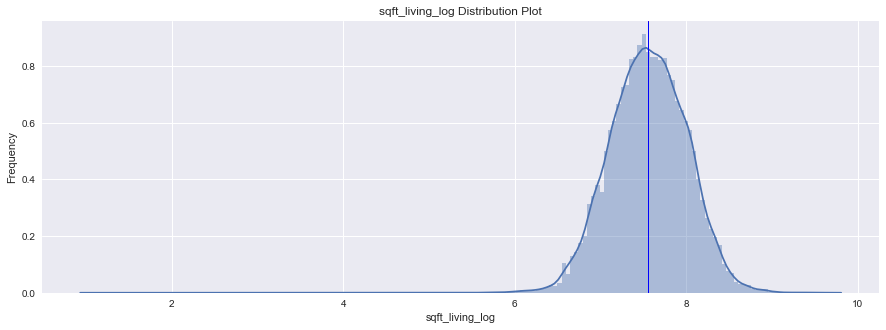

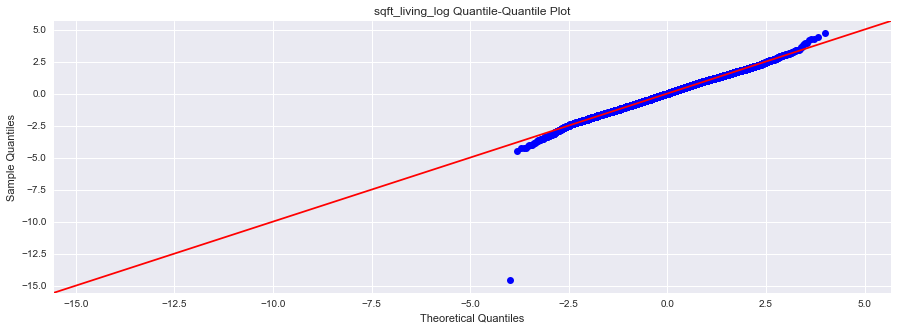

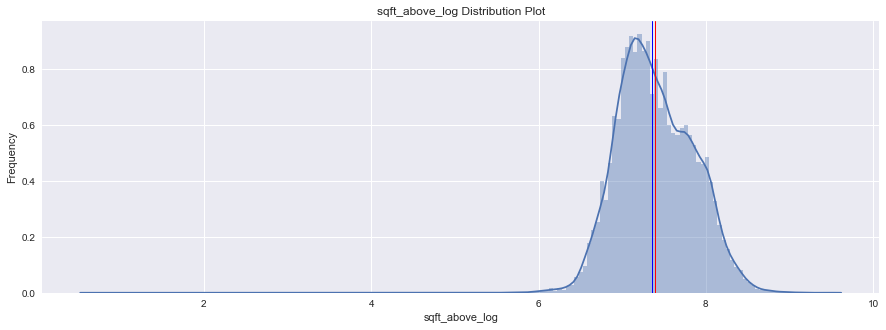

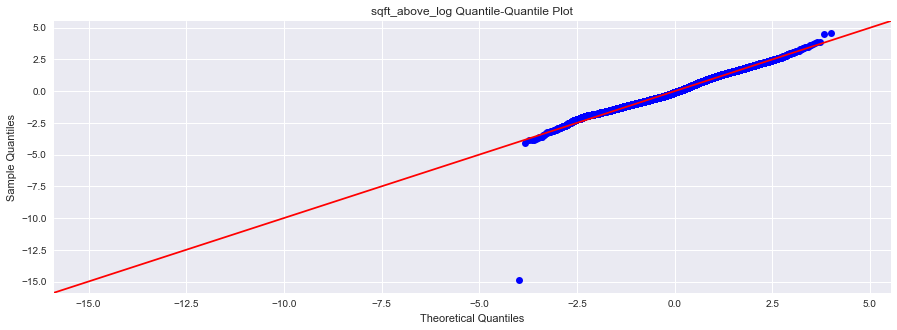

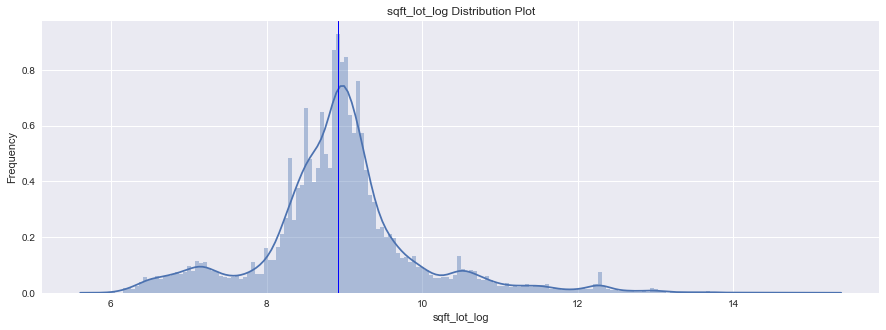

,Variable,Skewness,Kurtosis
0,sqft_living_log,-0.153745,1.523212
1,sqft_above_log,0.098969,1.355249
2,sqft_lot_log,0.657917,2.779017


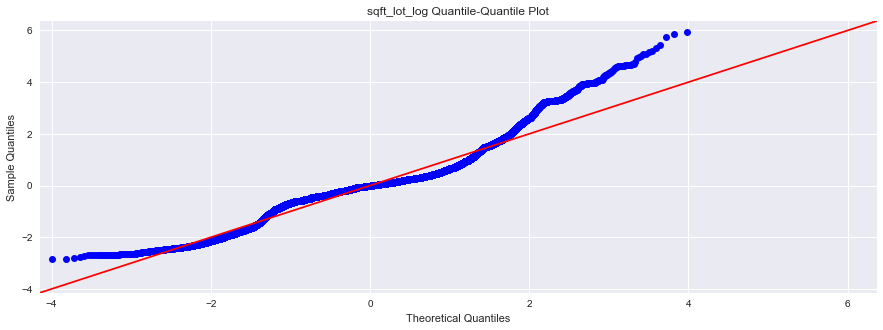

In [37]:
# Use Linearity Function check
continuos_log = ["sqft_living_log", "sqft_above_log", "sqft_lot_log"]
linearity_check(king, continuos_log)

Now that we have everything normalized lets check the corelations between variables and price using a matrix. 

In [50]:
def view_correlation(data, subset):
    subset = subset + ['price', 'price_log']  # Add 'price' and 'price_log' to the subset list
    for col in subset:
        #plot 'price' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        sns.regplot(
            x = data[col],
            y = data['price'],
            data = data,
            scatter=True,
            fit_reg=True,
            color='blue'
        )
        plt.title(f'{col} of The Home vs. Price')
        plt.xlabel(f'{col}')
        plt.ylabel('Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        sns.regplot(
            x = data[col],
            y = data['price_log'],
            data = data,
            scatter=True,
            fit_reg=True,
            color='red'
        )
        plt.title(f'{col} of The Home vs. Log Price')
        plt.xlabel(f'{col}')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
    corr_df = data[subset].corr()
    return corr_df

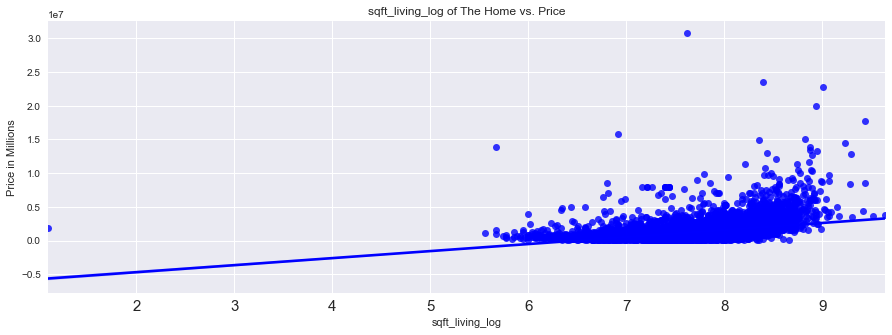

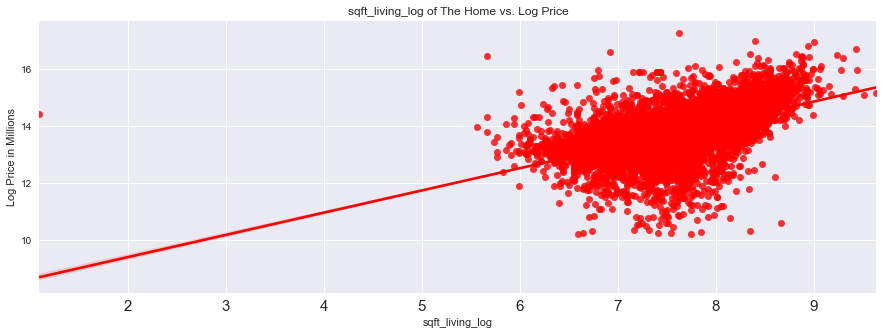

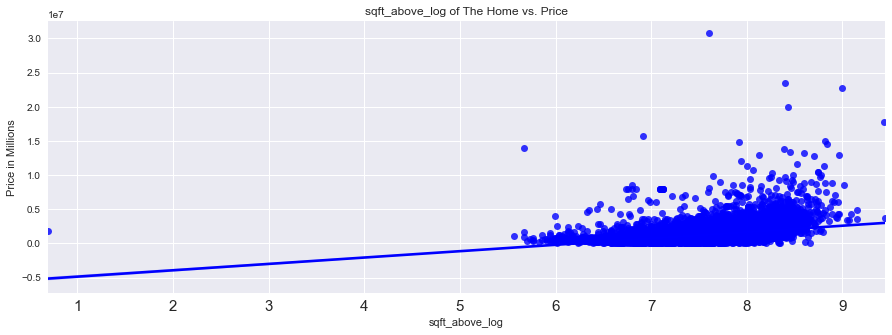

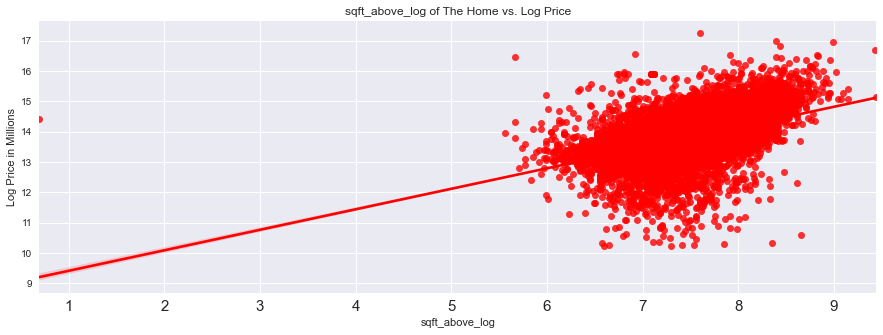

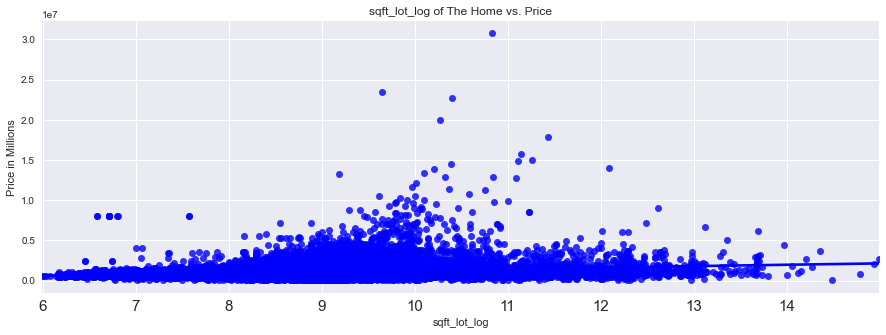

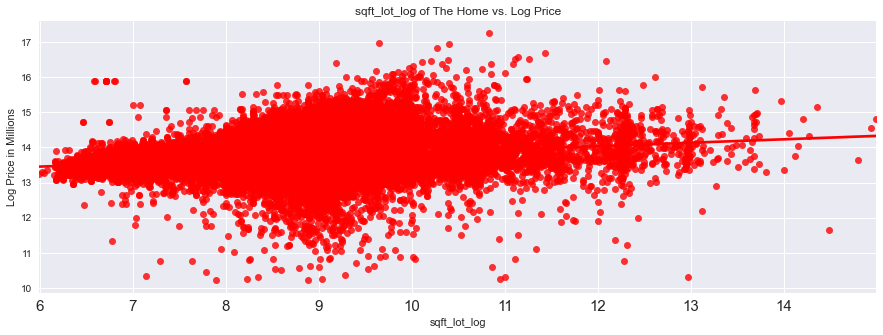

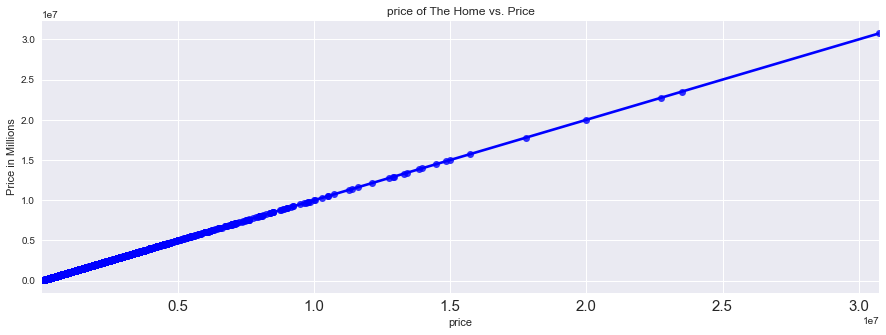

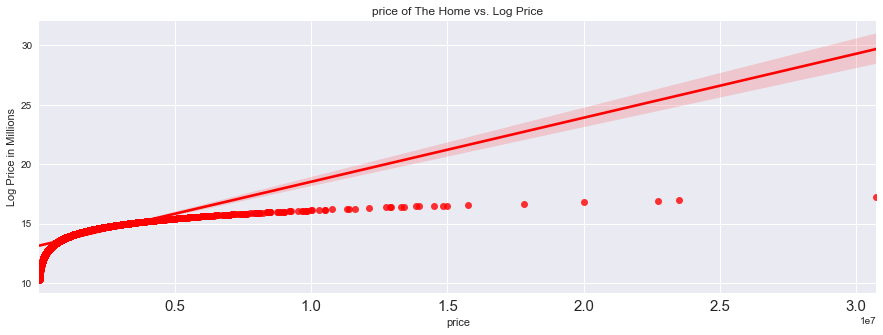

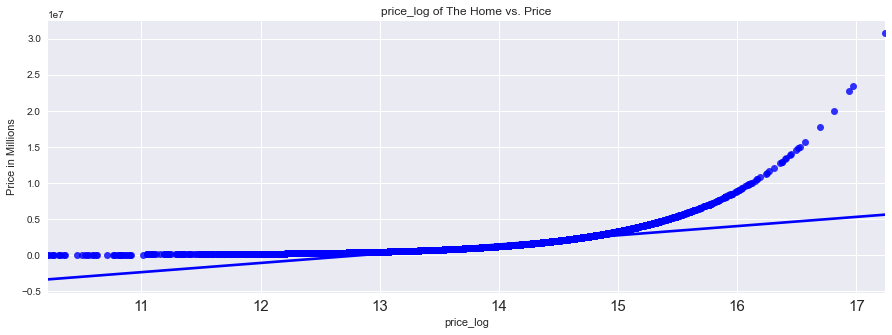

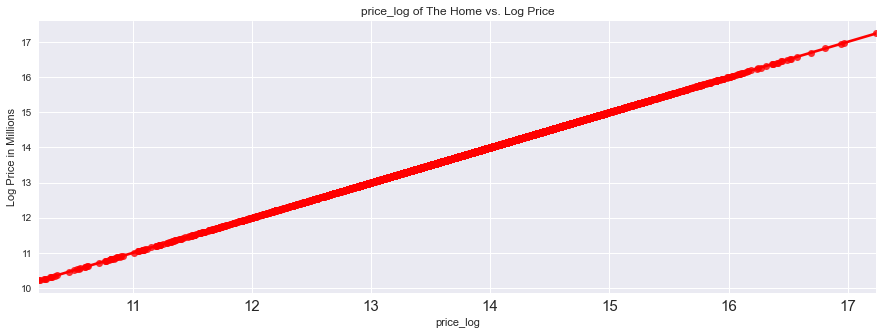

,sqft_living_log,sqft_above_log,sqft_lot_log,price,price_log
sqft_living_log,1.000000,0.874526,0.307858,0.515395,0.591033
sqft_above_log,0.874526,1.000000,0.316209,0.466982,0.522001
sqft_lot_log,0.307858,0.316209,1.000000,0.194257,0.170734
price,0.515395,0.466982,0.194257,1.000000,0.829922
price_log,0.591033,0.522001,0.170734,0.829922,1.000000


In [51]:
subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log"]
view_correlation(king, subset)

**Observations:**
1. sqft_living_log and sqft_above_log are moderately positively correlated with price_log. 
2. sqft_lot_log has very little to none with price_log

**Observations:**
1. Using price that is not transformed is probably better mainly because it would be easier to interpret coefficients in Linear regression models. We can connvert the transmission by divinding by 100 and take advantage of the property of logarithmic functions. We can state that for each increase of 1% in <feature>, we see an associated change of <coefficient / 100> in target.
2. sqft_living_log is moderately positively correlated with price.
3. sqft_lot_log and sgft_above log have little correlation with price

Now that the continuos variables are explored and interpreted lets view the interactions of basement, patio, and garage with price

First investigation is Basement:

In [ ]:
"""
Right now the dataframe has basement sqft data. 
Maybe we can distinguish if having a basement actually controbutes to a higher home value.
We can create a new column that returns 1 if there is a basement and 0 if there is no basement. 
"""

In [52]:
# Treat basement as categorical variable
king['basement'] = king['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

king.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,lat,long,extracted_grade_num,extracted_class,condition_num,price_log,sqft_living_log,sqft_above_log,sqft_lot_log,basement
21177,2021-10-20,248448.0,3,1.5,1790,39808,1.0,NO,NO,NO,...,47.32178,-122.21875,7,Average,4,12.422989,7.489971,7.489971,10.591823,0
10844,2022-04-05,609000.0,4,1.5,2232,12866,1.5,NO,NO,NO,...,47.32083,-122.21874,7,Average,4,13.319574,7.710653,7.710653,9.462343,0
9292,2022-05-26,1020000.0,5,2.0,2760,15156,1.0,NO,NO,NO,...,47.44375,-122.34868,8,Good,4,13.835313,7.922986,7.229839,9.626152,1
17878,2022-01-03,610000.0,5,2.0,2420,15552,1.0,NO,NO,NO,...,47.48387,-122.24393,7,Average,3,13.321214,7.791523,7.098376,9.651945,1
14450,2022-03-09,700000.0,3,2.0,1720,8620,1.5,NO,NO,NO,...,47.47707,-122.26385,7,Average,5,13.458836,7.450080,7.450080,9.061840,0


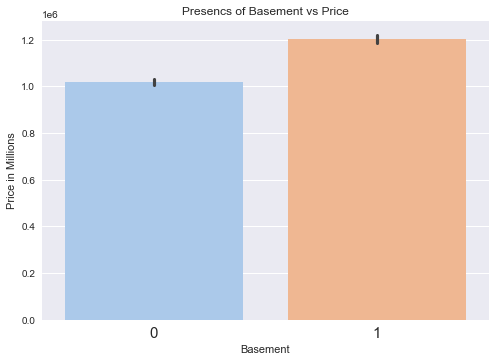

In [53]:
# Make a barplot of basement vs price
sns.barplot(x=king['basement'], 
            y=king['price'],
            palette="pastel",
            )
plt.title("Presencs of Basement vs Price")
plt.xlabel("Basement")
plt.ylabel("Price in Millions")
plt.xticks(fontsize = 15)
plt.show()

**Observation:**
1. It seems that having a basement does increase the price of a home in King County.

In [ ]:
"""
Use Basement as an interaction term for the other continuos variables. 
"""

In [63]:
def price_interations(data, subset):
    subset = subset + ['price', 'price_log', 'basement']  # Add 'price' and 'price_log' to the subset list
    for col in subset:
        #plot 'price' vs. sqft_subset_log'
        plt.figure(figsize = (15, 10))
        data.plot.scatter(
            x = col,
            y = 'price',
            c = 'basement',
            cmap = 'plasma',
            alpha = 0.5,
        );
        plt.title(f'{col} of The Home vs. Price')
        plt.ylabel('Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        data.plot.scatter(
            x = col,
            y = 'price_log',
            c = 'basement',
            cmap = 'plasma',
            alpha = 0.5,
        );
        plt.title(f'{col} of The Home vs. Log Price')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
    # Compute the correlation matrix between 'basement', 'price', and 'price_log'
    corr_matrix = data[['basement', 'price', 'price_log']].corr()
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix: Basement, Price, and Log Price')
    plt.show()

<Figure size 1080x720 with 0 Axes>

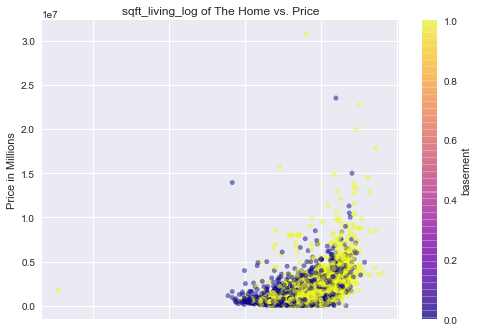

<Figure size 1080x360 with 0 Axes>

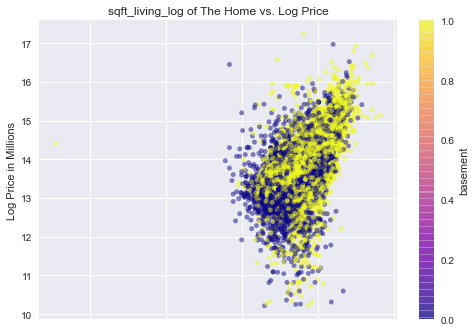

<Figure size 1080x720 with 0 Axes>

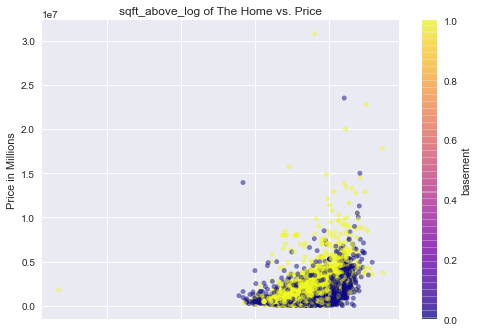

<Figure size 1080x360 with 0 Axes>

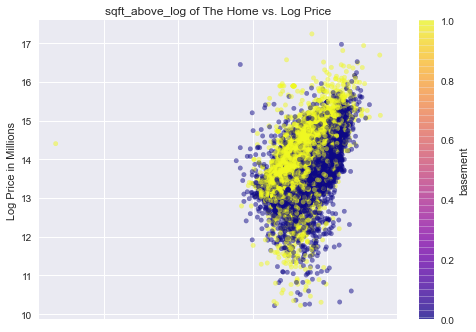

<Figure size 1080x720 with 0 Axes>

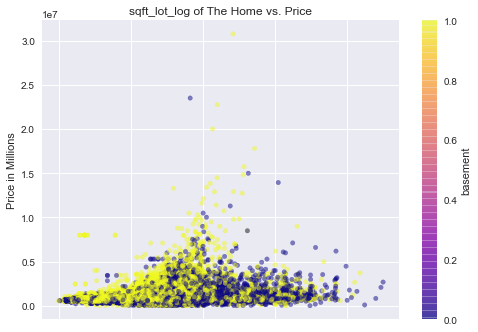

<Figure size 1080x360 with 0 Axes>

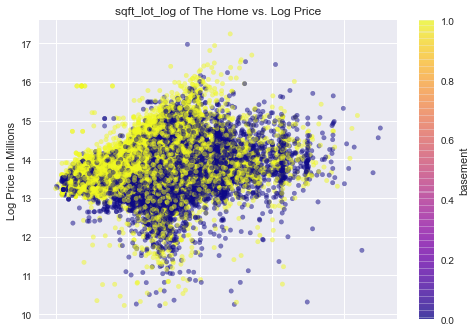

<Figure size 1080x720 with 0 Axes>

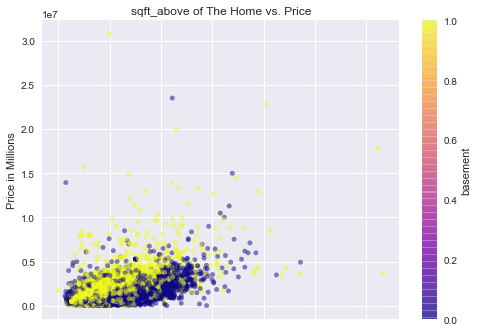

<Figure size 1080x360 with 0 Axes>

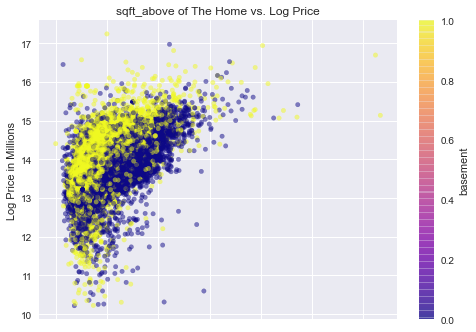

<Figure size 1080x720 with 0 Axes>

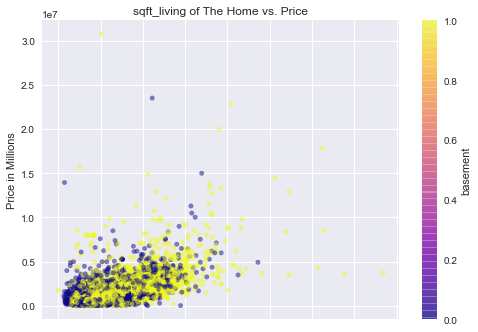

<Figure size 1080x360 with 0 Axes>

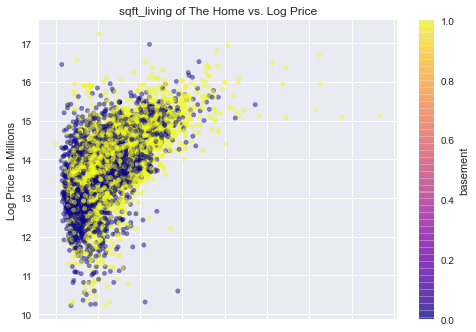

<Figure size 1080x720 with 0 Axes>

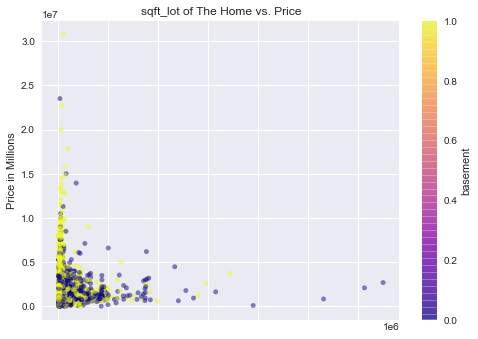

<Figure size 1080x360 with 0 Axes>

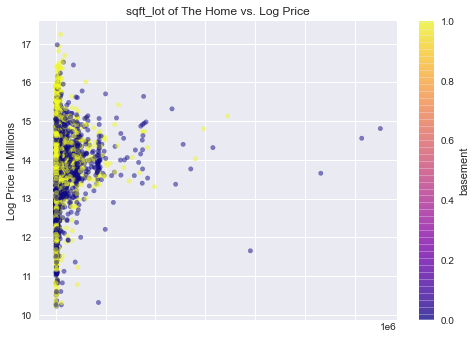

<Figure size 1080x720 with 0 Axes>

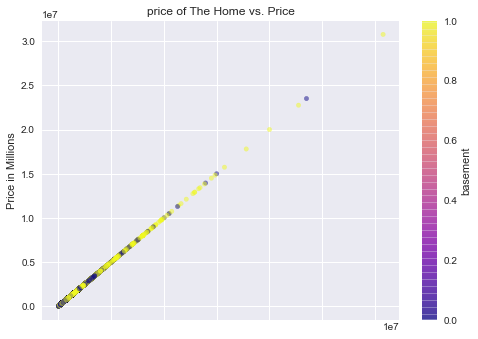

<Figure size 1080x360 with 0 Axes>

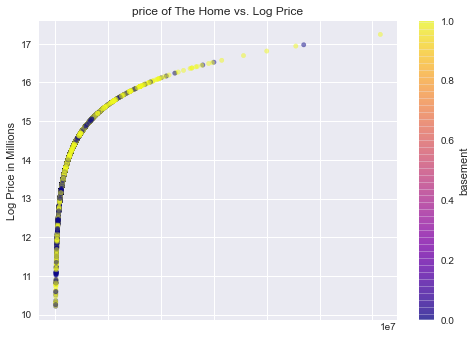

<Figure size 1080x720 with 0 Axes>

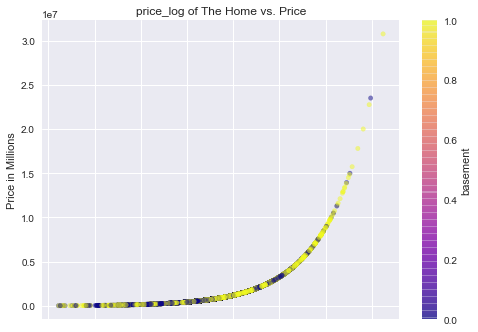

<Figure size 1080x360 with 0 Axes>

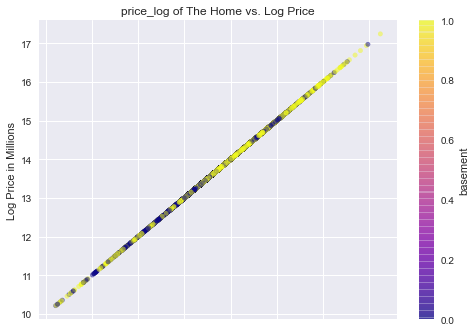

<Figure size 1080x720 with 0 Axes>

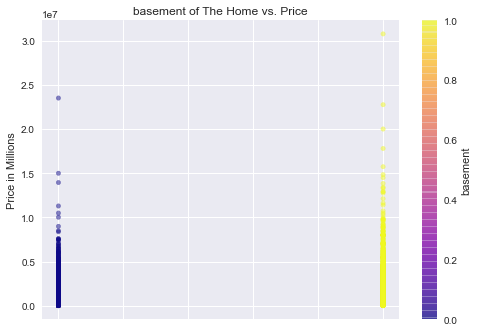

<Figure size 1080x360 with 0 Axes>

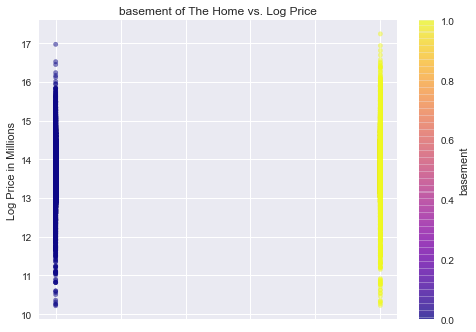

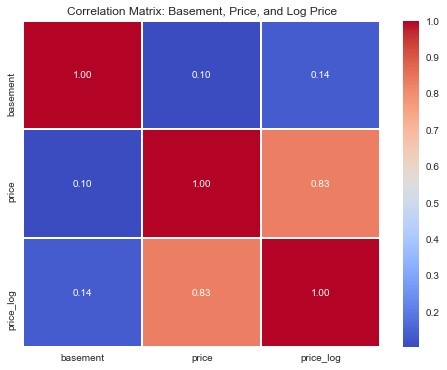

In [64]:
subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log", "sqft_above", "sqft_living", "sqft_lot"]
price_interations(king, subset)

**Observations:**
1. Overall there seems to be more houses with basements.
2. According to the interaction scatter plots the presence of a basement can increase a home value however it is not a consistent indicator that it would outcompete a home with no basement. This can be seen with the correlations of basement with price, price_log. This suggests there there is some influence that is not being accounted for in a price for a home in King County. 

Next investigation is Garage

In [ ]:
# Treat basement as categorical variable
king['basement'] = king['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)